In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import sklearn.model_selection

In [2]:
mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [3]:
mnist_df=pd.DataFrame(mnist_data)
mnist_df["y"]=mnist_label
mnist_df


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [4]:
df_new=pd.DataFrame()
for i in range(0,10):
    temp=mnist_df[mnist_df['y']==i].iloc[0:200]
    df_new=df_new.append(temp,ignore_index=True)
df_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [5]:
x=df_new.iloc[:,:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x=x.apply(lambda x:((x)/255.0).astype(np.float128))

In [7]:
y=df_new['y']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1995    9.0
1996    9.0
1997    9.0
1998    9.0
1999    9.0
Name: y, Length: 2000, dtype: float64

In [8]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,train_size=0.8,random_state=20)

In [9]:
mean = np.zeros((10,x.shape[1]),dtype=np.float128)
mean.shape

(10, 784)

In [10]:
variance = np.zeros((10,784,784),dtype=np.float128)
variance.shape

(10, 784, 784)

In [11]:
temp=x_train.groupby([y_train]).mean()
temp

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
y,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002878,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
mean=temp.to_numpy()
mean.shape

(10, 784)

In [13]:
for i in range(0,10):
    X_class_c=x_train[y_train==i]
    variance[i,:]=np.cov(X_class_c.T)


In [14]:
def pdf(mu,sigma,data):
   return mvn.pdf(data,mu,sigma,allow_singular=True)


In [15]:
priors=np.zeros(10,dtype=np.float128)

In [16]:
y_count = y_train.value_counts(sort=False)
y_count

7.0    154
2.0    150
8.0    165
3.0    160
9.0    165
0.0    157
4.0    164
1.0    157
5.0    164
6.0    164
Name: y, dtype: int64

In [17]:
yc=np.zeros(10,dtype=np.float128)
for i in range(0,10):
  yc[i]=y_count[i]
yc

array([157., 157., 150., 160., 164., 164., 164., 154., 165., 165.],
      dtype=float128)

In [18]:
for i in range(0, 10):
  priors[i] = yc[i]/y_train.shape[0]
priors

array([0.098125, 0.098125, 0.09375 , 0.1     , 0.1025  , 0.1025  ,
       0.1025  , 0.09625 , 0.103125, 0.103125], dtype=float128)

In [19]:
y_pred=np.zeros(y_test.shape[0])
for i in range(0,x_test.shape[0]):
    f=np.zeros(10,dtype=np.float128)
    for j in range(0,10):
        f[j]=pdf(mean[j],variance[j],x_test.iloc[i])
    f=np.multiply(f,priors)
    y_pred[i]=np.argmax(f)

In [20]:
acc= sklearn.metrics.accuracy_score(y_test,y_pred)
acc

0.7875

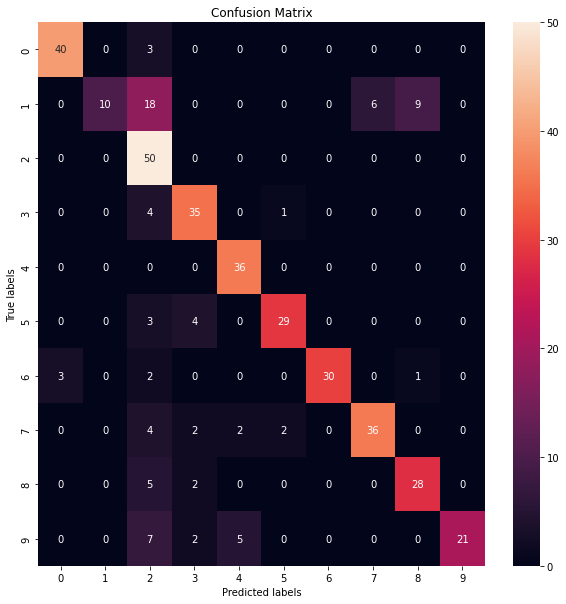

In [21]:
confusionMat=sklearn.metrics.confusion_matrix(y_test,y_pred)
confusionMat
ax= plt.subplots(figsize=(10,10))

ax=sns.heatmap(confusionMat, annot=True, fmt='g'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 